# Cálculos

In [127]:
TOP = 40000
N = 8
CLOCK = int(16e6)
Fpwm = 50

offset = 1000

OCR1A = offset
OCR2A = offset

min = 500 #ms
max = 2500 #ms

min_pwm = 1000
max_pwm = 5092

# theta0 = 0 e thetaf = 180
a = (180 - 0) / (5092 - 1000)
b = 180 - a * 5092

print(f"{a}*x + {b} = theta")

1 / (CLOCK / N)

0.04398826979472141*x + -43.98826979472142 = theta


5e-07

# Mapeamento

## Servo da base

a*x +b = theta
[0.04692972]*x + [-40.56342193]= theta


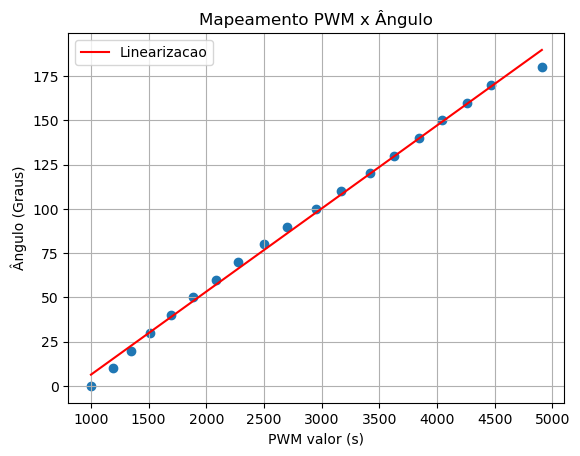

In [66]:
import numpy as np
import matplotlib.pyplot as plt

s = np.array([[1000, 1188, 1344, 1508, 1692,
              1884, 2088, 2276, 2500, 2700,
              2952, 3164, 3416, 3628, 3844,
              4040, 4260, 4468, 4908]]).reshape(19,1)

theta = np.arange(0, 190, 10).reshape(19,1)

temp = np.ones((19,1))

mtx = np.concatenate((s,temp), axis=1)

a, _, _, _= np.linalg.lstsq(mtx, theta, rcond=1)
print(f'a*x +b = theta\n{a[0]}*x + {a[1]}= theta')

plt.scatter(s, theta)
plt.plot(s, a[0]*s + a[1], label="Linearizacao", color='red')

plt.xlabel('PWM valor (s)')
plt.ylabel('Ângulo (Graus)')
plt.title('Mapeamento PWM x Ângulo')
plt.grid()
plt.legend()

plt.show()

del temp

# Leitura dos angulos pelo csv

200    55.298421
210    58.005433
220    60.096562
230    59.895458
240    58.993627
250    58.495268
260    58.055493
270    57.089507
280    56.409102
290    54.197237
Name: ombro->cotovelo, dtype: float64


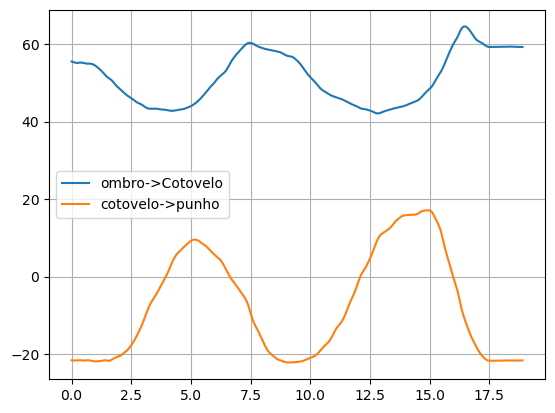

In [125]:
import pandas as pd

data = pd.read_csv('Angulos_articulares_tempo.csv', sep=';')
data['ombro->cotovelo']

graus = np.rad2deg(data['ombro->cotovelo']/np.pi)+90
print(graus[200:300:10])

plt.plot(data['Tempo (s)'], np.rad2deg(data['ombro->cotovelo']/np.pi)+90, label='ombro->Cotovelo')
plt.plot(data['Tempo (s)'], np.rad2deg(data['cotovelo->punho']/np.pi)-90, label='cotovelo->punho')

plt.grid()
plt.legend()

plt.show()